# Madison Qualley
## Week 16, 12/13/2020
### Continued from week 15, Python data cleaning and visualization project - stock market project

In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

#these are plotting modules and libraries we'll use:
import matplotlib as mp1
import matplotlib.pyplot as plt
#import seaborn as sns

#command so that plots appear in the ipyhton notebook
%matplotlib inline

In [2]:
#upload dataset from csv file
data = pd.read_csv('AMZN.csv')

In [3]:
data.head(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [4]:
data.tail(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
2232,11/13/2020,yahoo,3122.000000,3141.719971,3085.389893,3128.810059,3128.810059,3756200,amazon
2233,11/16/2020,yahoo,3093.199951,3142.699951,3072.689941,3131.060059,3131.060059,3808700,amazon
2234,11/17/2020,yahoo,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444700,amazon
2235,11/18/2020,yahoo,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916800,amazon
2236,11/19/2020,yahoo,3105.310059,3125.000000,3080.919922,3117.020020,3117.020020,3010300,amazon
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon
2241,11/27/2020,yahoo,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900,amazon


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


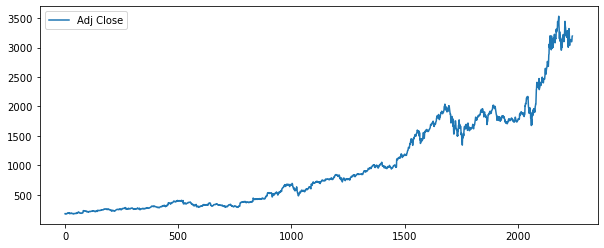

In [7]:
data['Adj Close'].plot(legend=True, figsize=(10,4))

In [8]:
#count the number of numerical and none-numerical variables(columns)
from pandas.api.types import is_numeric_dtype

n= 0

for c in data.columns:
    if is_numeric_dtype(data[c]):
        n+=1
        
print('numerical variables: ', n, 'none-numerical variables: ', len(data.columns)-n)

numerical variables:  6 none-numerical variables:  3


In [9]:
#number of missing values in each row
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [10]:
#data cleaning to prepare data for analytics
data.isnull()

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2237,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False
2239,False,False,False,False,False,False,False,False,False
2240,False,False,False,False,False,False,False,False,False


In [11]:
#number of missing values in each row
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [12]:
#handling missing data
data.dropna(inplace= True)

In [13]:
data.isnull().sum()

Date         0
Source       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2235 non-null   object 
 1   Source     2235 non-null   object 
 2   Open       2235 non-null   float64
 3   High       2235 non-null   float64
 4   Low        2235 non-null   float64
 5   Close      2235 non-null   float64
 6   Adj Close  2235 non-null   float64
 7   Volume     2235 non-null   int64  
 8   Stock      2235 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 174.6+ KB


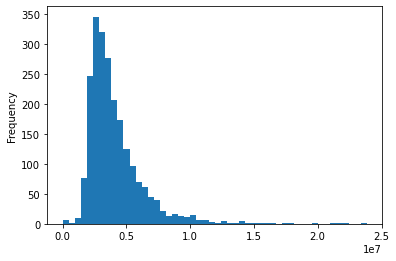

In [15]:
#clean abnormal values
data['Volume'].plot(kind='hist', bins = 50)

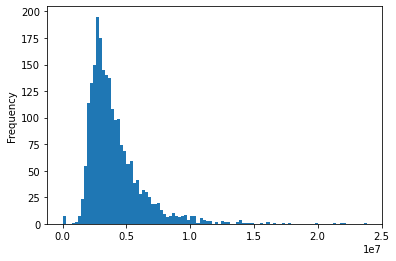

In [16]:
data['Volume'].plot(kind='hist', bins = 100)

In [17]:
data['Volume'].min()

0

In [18]:
data['Volume'].max()

23856100

In [19]:
data['Volume'].sort_values(ascending = True).head(20)

29            0
114           1
18            5
161           6
47           23
90           25
66           78
2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
Name: Volume, dtype: int64

In [20]:
# we remove the volume with the extreme low values <100,000 - filter
data = data[data['Volume']>100000]
data.shape

(2228, 9)

In [21]:
data['Volume'].sort_values(ascending=True).head(20)

2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
749     1513800
1167    1524100
151     1534300
417     1534700
152     1548100
1160    1563300
416     1566400
Name: Volume, dtype: int64

In [22]:
#remove all columns that have a constant/single value
data.head(20)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [31]:
#remove columns
constant_columns=[]
for c in data.columns:
    n = len(data[c].unique())
    if n == 1:
        constant_columns.append(c)
        
print('Constant columns: ', constant_columns)


Constant columns:  ['Source', 'Stock']


In [34]:
# drop/remove the constant columns from the data set
data.drop(columns=constant_columns,axis=1,inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [35]:
# adding year, month, day columns to the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.2+ KB


In [37]:
dataObject = pd.DatetimeIndex(data['Date'])

In [38]:
dataObject

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=2228, freq=None)

In [39]:
data['Year']=dataObject.year
data['Month']=dataObject.month
data['Day']=dataObject.day
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,2020,11,20
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,2020,11,23
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,2020,11,24
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,2020,11,25


In [40]:
data[['Date','Year','Month','Day']]

,Date,Year,Month,Day
0,1/3/2012,2012,1,3
1,1/4/2012,2012,1,4
2,1/5/2012,2012,1,5
3,1/6/2012,2012,1,6
4,1/9/2012,2012,1,9
...,...,...,...,...
2237,11/20/2020,2020,11,20
2238,11/23/2020,2020,11,23
2239,11/24/2020,2020,11,24
2240,11/25/2020,2020,11,25


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
 7   Year       2228 non-null   int64  
 8   Month      2228 non-null   int64  
 9   Day        2228 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 191.5+ KB


In [42]:
# Transform the values of volume entries to represent thousands
data[['Volume']]=data[['Volume']]/1000
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9


In [43]:
#show the trend of sum of volume over years
data[['Year','Volume']].groupby('Year').sum()

,Volume
Year,
2012,975492.4
2013,747905.7
2014,1029066.7
2015,957102.0
2016,1038756.3
2017,882705.4
2018,1417897.6
2019,974729.4
2020,1166035.7


Text(0, 0.5, "Stock's Volume")

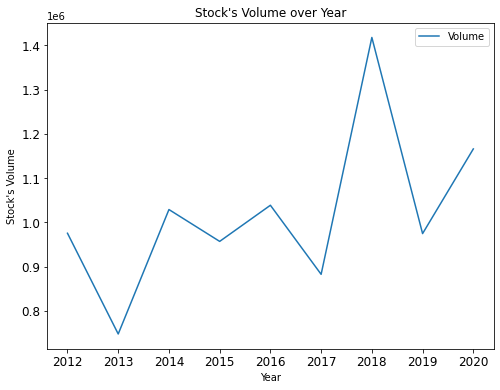

In [44]:
#plot the data
data[['Year','Volume']].groupby('Year').sum().plot(figsize= (8,6),y='Volume', fontsize=12, title="Stock's Volume over Year")
plt.ylabel("Stock's Volume")

In [46]:
#show the trend of  the stock's volume over months

data[['Month','Volume']].groupby('Month').sum()

,Volume
Month,
1,884620.5
2,846030.2
3,839584.5
4,890804.0
5,693382.7
6,671267.7
7,792035.2
8,633655.4
9,650017.7


Text(0, 0.5, "Stock's Volume")

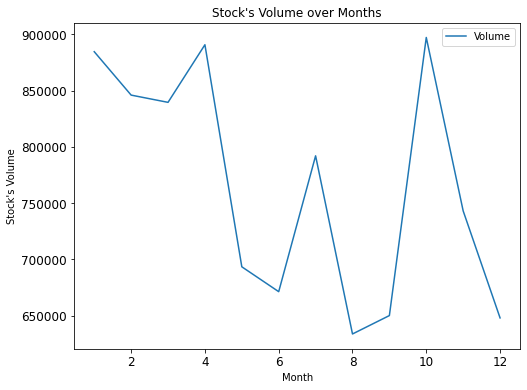

In [47]:
#plot the data

data[['Month','Volume']].groupby('Month').sum().plot(figsize= (8,6),y='Volume', fontsize=12, title="Stock's Volume over Months")

plt.ylabel("Stock's Volume")

Text(0, 0.5, "Stock's Volume")

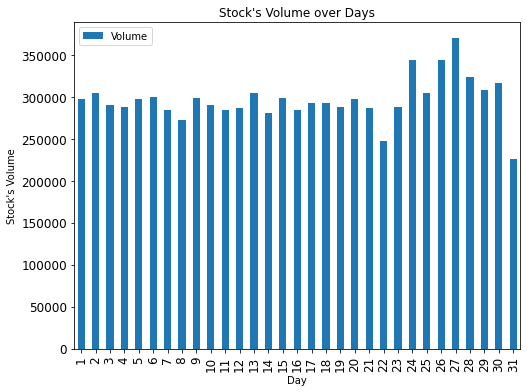

In [49]:
# days
#plot the data

data[['Day','Volume']].groupby('Day').sum().plot.bar(figsize= (8,6),y='Volume', fontsize=12, title="Stock's Volume over Days")

plt.ylabel("Stock's Volume")

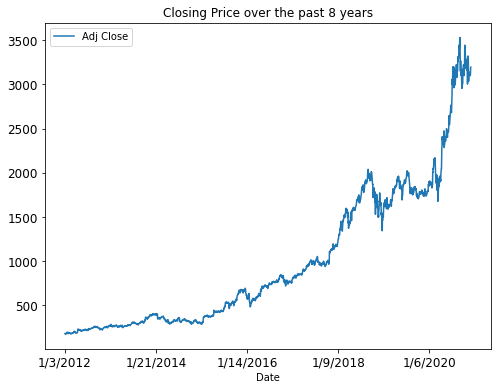

In [54]:
#show the average of closing per year:
data[['Date','Adj Close']].plot(figsize= (8,6), x='Date', y='Adj Close', fontsize=12, 
                                title="Closing Price over the past 8 years")



In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   float64
 7   Year       2228 non-null   int64  
 8   Month      2228 non-null   int64  
 9   Day        2228 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 191.5+ KB


In [57]:
#transform the date columns from object
data['Date'] =pd.to_datetime(data['Date'],format='%m/%d/%Y')

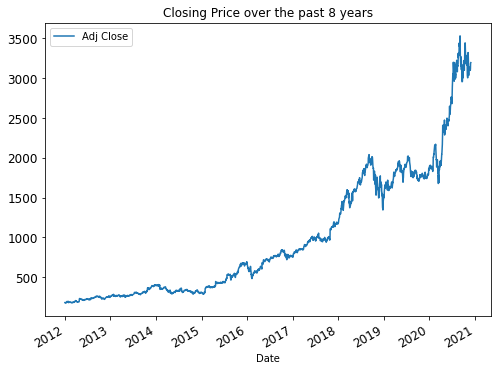

In [58]:
data[['Date','Adj Close']].plot(figsize= (8,6), x='Date', y='Adj Close', fontsize=12, 
                                title="Closing Price over the past 8 years")

Text(0, 0.5, 'Sum of Adj Close')

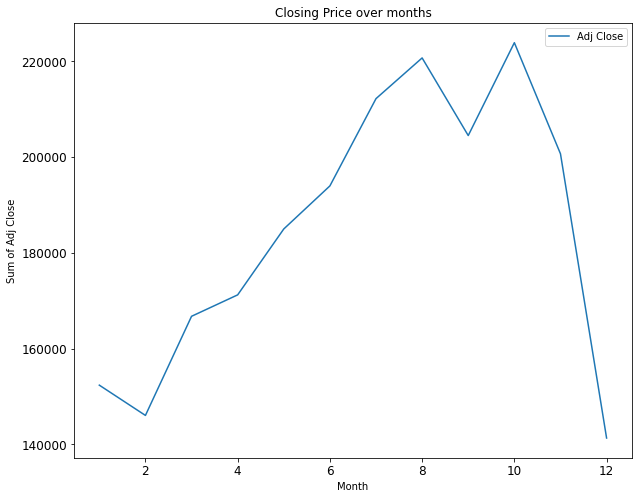

In [59]:
#show the closing price over months
data[['Month','Adj Close']].groupby('Month').sum().plot(figsize= (10,8), y='Adj Close', fontsize=12, 
                                title="Closing Price over months")

plt.ylabel('Sum of Adj Close')

Text(0, 0.5, 'Sum of Adj Close')

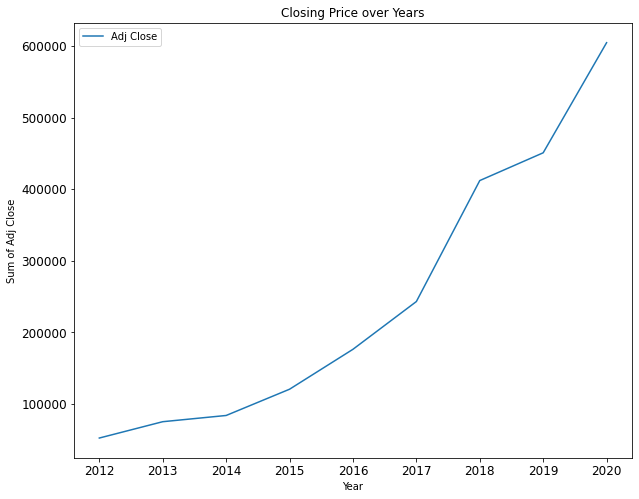

In [60]:
data[['Year','Adj Close']].groupby('Year').sum().plot(figsize= (10,8), y='Adj Close', fontsize=12, 
                                title="Closing Price over Years")

plt.ylabel('Sum of Adj Close')

Text(0, 0.5, 'Sum of Adj Close')

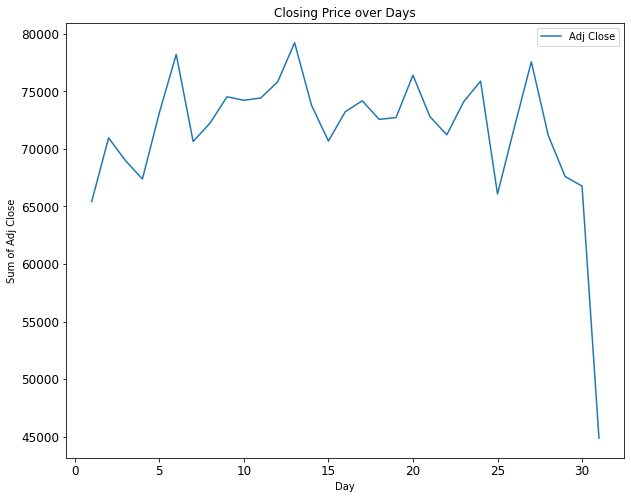

In [61]:
data[['Day','Adj Close']].groupby('Day').sum().plot(figsize= (10,8), y='Adj Close', fontsize=12, 
                                title="Closing Price over Days")

plt.ylabel('Sum of Adj Close')

Text(0, 0.5, 'Sum of Adj Close')

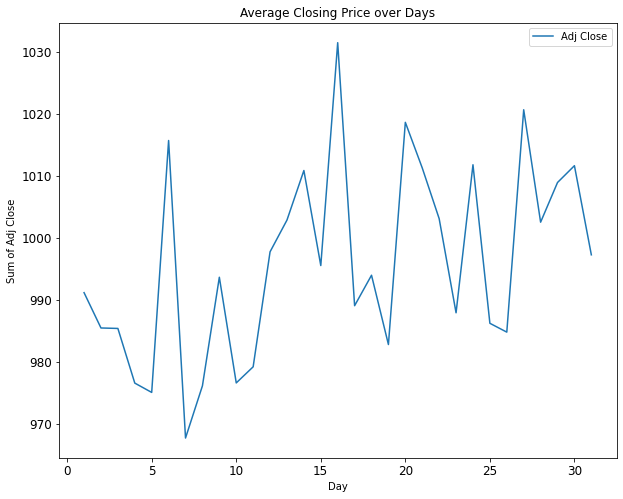

In [62]:
#Show the average of the closing price over months
data[['Day','Adj Close']].groupby('Day').mean().plot(figsize= (10,8), y='Adj Close', fontsize=12, 
                                title="Average Closing Price over Days")

plt.ylabel('Sum of Adj Close')

Text(0, 0.5, 'Sum of Adj Close')

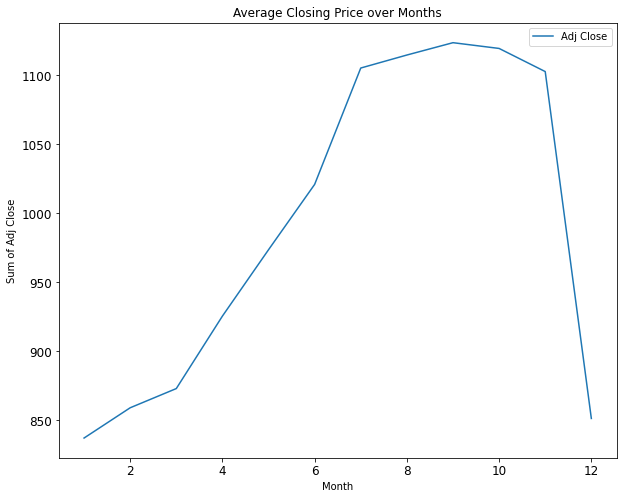

In [63]:
#Show the average of the closing price over months
data[['Month','Adj Close']].groupby('Month').mean().plot(figsize= (10,8), y='Adj Close', fontsize=12, 
                                title="Average Closing Price over Months")

plt.ylabel('Sum of Adj Close')

Text(0, 0.5, 'Sum of Adj Close')

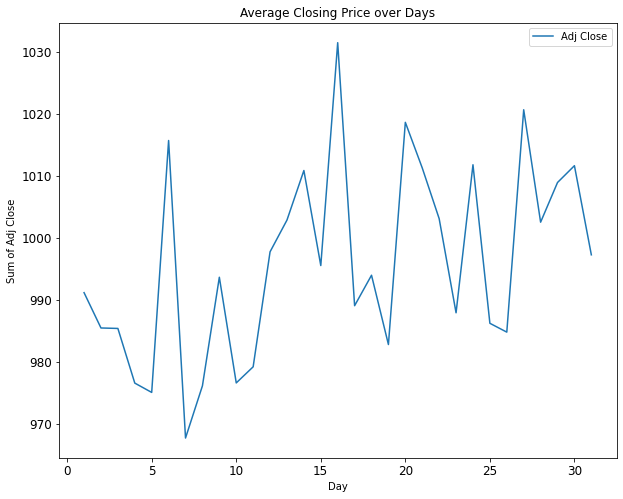

In [64]:
#show the average of the closing price over days
data[['Day','Adj Close']].groupby('Day').mean().plot(figsize= (10,8), y='Adj Close', fontsize=12, 
                                title="Average Closing Price over Days")

plt.ylabel('Sum of Adj Close')

In [65]:
#Plot the Adj Close prices that are smaller than the open prices after 2015
filter1 = data[data['Year']>2015]
len(filter1)

1236

In [66]:
filter2=data[data['Adj Close']< data['Open']]
len(filter2)

1105

In [69]:
filter2[['Adj Close','Open']]

,Adj Close,Open
1,177.509995,179.210007
4,178.559998,182.759995
5,179.339996,181.100006
6,178.899994,179.639999
7,175.929993,179.419998
...,...,...
2234,3135.659912,3183.540039
2235,3105.459961,3134.000000
2237,3099.399902,3117.020020
2238,3098.389893,3116.699951


In [70]:
filter1=data['Year']>2015
filter1

0       False
1       False
2       False
3       False
4       False
        ...  
2237     True
2238     True
2239     True
2240     True
2241     True
Name: Year, Length: 2228, dtype: bool

In [71]:
filter2=data['Adj Close'] < data['Open']
filter2

0       False
1        True
2       False
3       False
4        True
        ...  
2237     True
2238     True
2239    False
2240    False
2241     True
Length: 2228, dtype: bool

In [72]:
result = data[filter1 & filter2]
result


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
1006,2016-01-04,656.289978,657.719971,627.510010,636.989990,636.989990,9314.5,2016,1,4
1007,2016-01-05,646.859985,646.909973,627.650024,633.789978,633.789978,5822.6,2016,1,5
1009,2016-01-07,621.799988,630.000000,605.210022,607.940002,607.940002,7074.9,2016,1,7
1010,2016-01-08,619.659973,624.140015,606.000000,607.049988,607.049988,5512.9,2016,1,8
1012,2016-01-12,625.250000,625.989990,612.239990,617.890015,617.890015,4724.1,2016,1,12
...,...,...,...,...,...,...,...,...,...,...
2234,2020-11-17,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444.7,2020,11,17
2235,2020-11-18,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916.8,2020,11,18
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23


Text(0, 0.5, 'Number of Stocks')

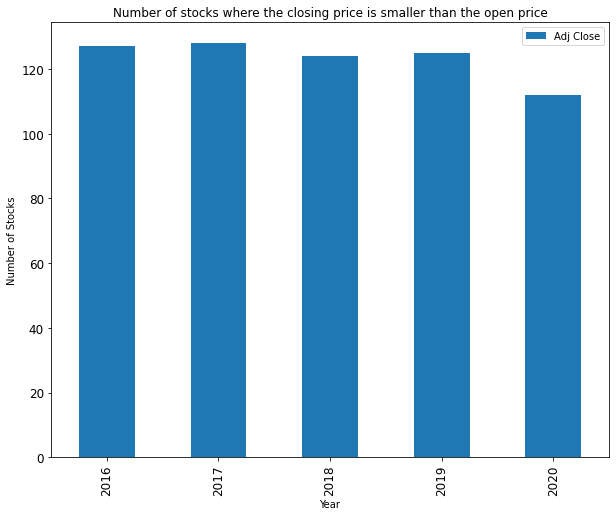

In [77]:
result[['Year', 'Adj Close']].groupby('Year').count().plot.bar(figsize=(10,8), y='Adj Close', fontsize =12,legend=True,
                                                          title = "Number of stocks where the closing price is smaller than the open price")
plt.ylabel('Number of Stocks')

In [78]:
result['Open'].sum()-result['Adj Close'].sum()

11206.19128899998

In [79]:
result['Open'].sum()-result['Adj Close'].mean()

945623.4522339269

Text(0, 0.5, 'Number of Stocks')

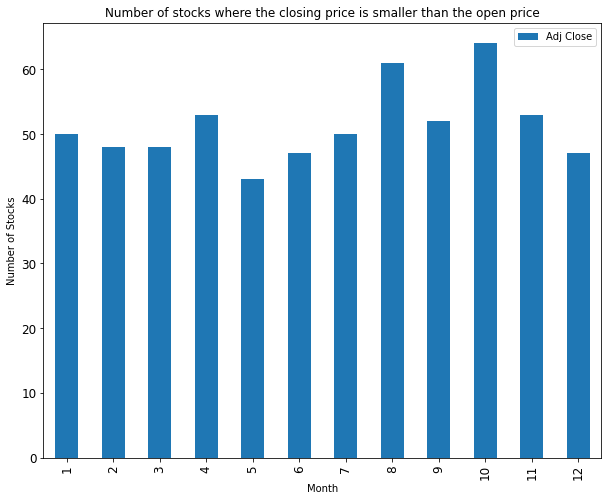

In [80]:
result[['Month', 'Adj Close']].groupby('Month').count().plot.bar(figsize=(10,8), y='Adj Close', fontsize =12,legend=True,
                                                          title = "Number of stocks where the closing price is smaller than the open price")
plt.ylabel('Number of Stocks')

In [82]:
result[['Month', 'Adj Close']].groupby('Month').count()

,Adj Close
Month,
1,50
2,48
3,48
4,53
5,43
6,47
7,50
8,61
9,52


Text(0, 0.5, 'Number of Stocks')

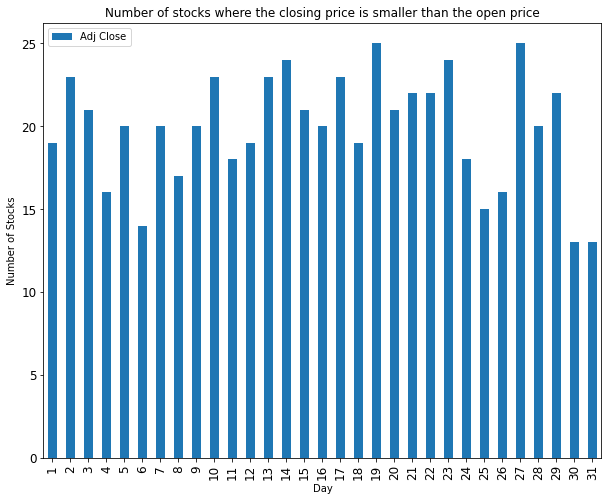

In [83]:
result[['Day', 'Adj Close']].groupby('Day').count().plot.bar(figsize=(10,8), y='Adj Close', fontsize =12,legend=True,
                                                          title = "Number of stocks where the closing price is smaller than the open price")
plt.ylabel('Number of Stocks')

Text(0, 0.5, 'Stocks Prices')

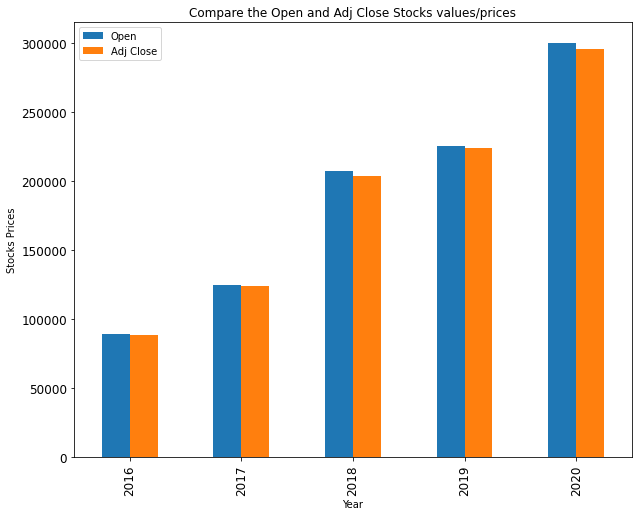

In [87]:
#Compare the open and Adj Close Values/Prices
result[['Year','Open','Day', 'Adj Close']].groupby('Year').sum().plot.bar(figsize=(10,8), y=['Open','Adj Close'], fontsize =12,legend=True,
                                                          title = "Compare the Open and Adj Close Stocks values/prices")
plt.ylabel("Stocks Prices")

Text(0, 0.5, 'Stocks Prices')

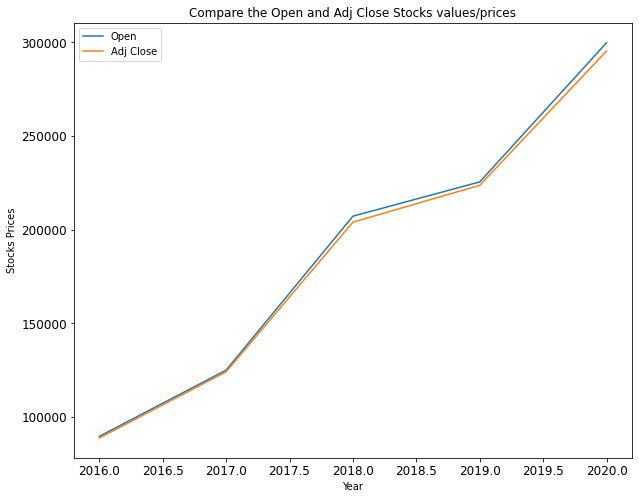

In [88]:
#Compare the open and Adj Close Values/Prices
result[['Year','Open','Day', 'Adj Close']].groupby('Year').sum().plot(figsize=(10,8), y=['Open','Adj Close'], fontsize =12,legend=True,
                                                          title = "Compare the Open and Adj Close Stocks values/prices")
plt.ylabel("Stocks Prices")

Text(0, 0.5, 'Stocks Prices')

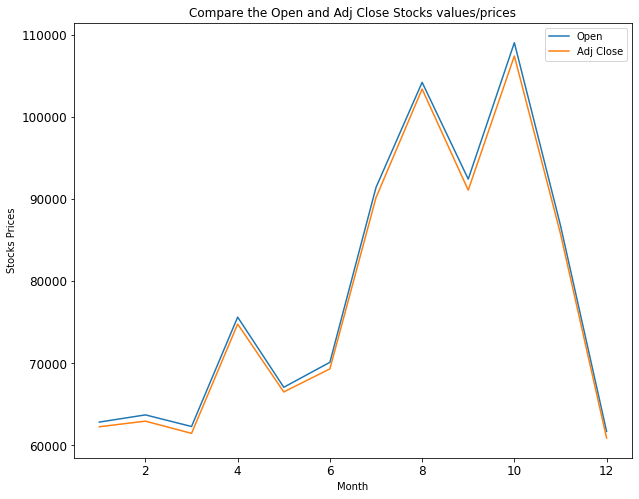

In [91]:
#Compare the open and Adj Close Values/Prices
result[['Month','Open','Day', 'Adj Close']].groupby('Month').sum().plot(figsize=(10,8), y=['Open','Adj Close'], fontsize =12,legend=True,
                                                          title = "Compare the Open and Adj Close Stocks values/prices")
plt.ylabel("Stocks Prices")

Text(0, 0.5, 'Stocks Prices')

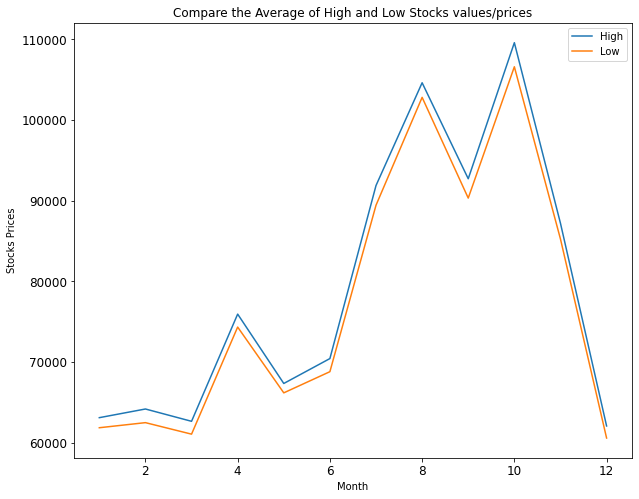

In [93]:
#Compare the high and low Values/Prices over months
result[['Month','High','Low']].groupby('Month').sum().plot(figsize=(10,8), y=['High','Low'], fontsize =12,legend=True,
                                                          title = "Compare the Average of High and Low Stocks values/prices")
plt.ylabel("Stocks Prices")

Text(0, 0.5, "Average of Stocks' Prices")

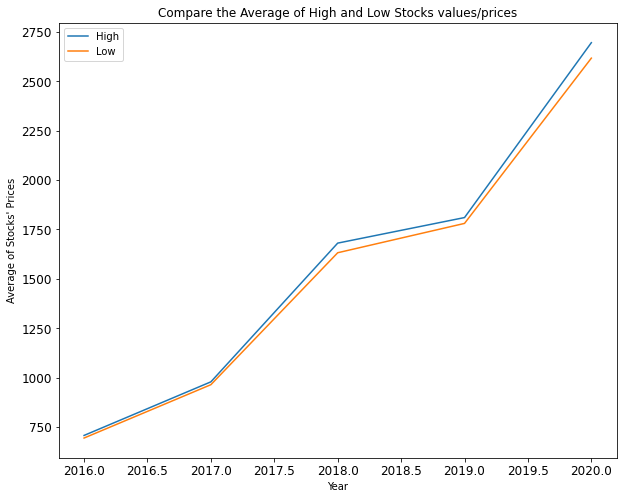

In [94]:
#Compare the high and low Values/Prices over months
result[['Year','High','Low']].groupby('Year').mean().plot(figsize=(10,8), y=['High','Low'], fontsize =12,legend=True,
                                                          title = "Compare the Average of High and Low Stocks values/prices")
plt.ylabel("Average of Stocks' Prices")

Text(0, 0.5, 'Average of Stocks Prices')

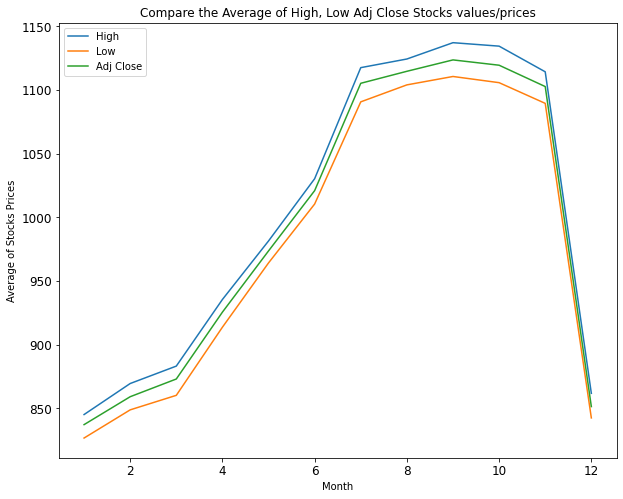

In [99]:
#Compare the high and low and AdjValues/Prices over months
data[['Month','High','Low','Adj Close']].groupby('Month').mean().plot(figsize=(10,8), y=['High','Low','Adj Close'], fontsize =12,legend=True,
                                                          title = "Compare the Average of High, Low Adj Close Stocks values/prices")
plt.ylabel("Average of Stocks Prices")

Text(0, 0.5, "Average of Stocks' Prices")

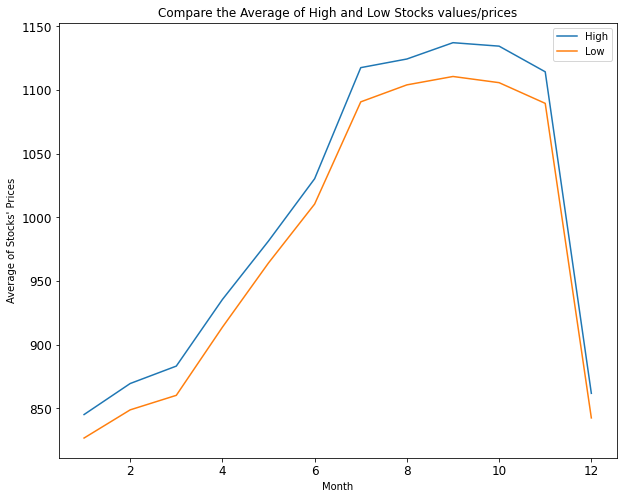

In [98]:
data[['Month','High','Low']].groupby('Month').mean().plot(figsize=(10,8), y=['High','Low'], fontsize =12,legend=True,
                                                          title = "Compare the Average of High and Low Stocks values/prices")
plt.ylabel("Average of Stocks' Prices")

Text(0, 0.5, 'Average of Stocks Prices')

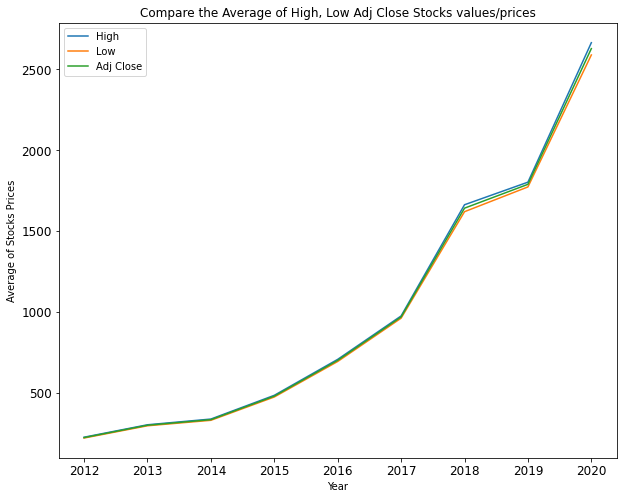

In [100]:
data[['Year','High','Low','Adj Close']].groupby('Year').mean().plot(figsize=(10,8), y=['High','Low','Adj Close'], fontsize =12,legend=True,
                                                          title = "Compare the Average of High, Low Adj Close Stocks values/prices")
plt.ylabel("Average of Stocks Prices")

Text(0, 0.5, 'Average of Stocks Prices')

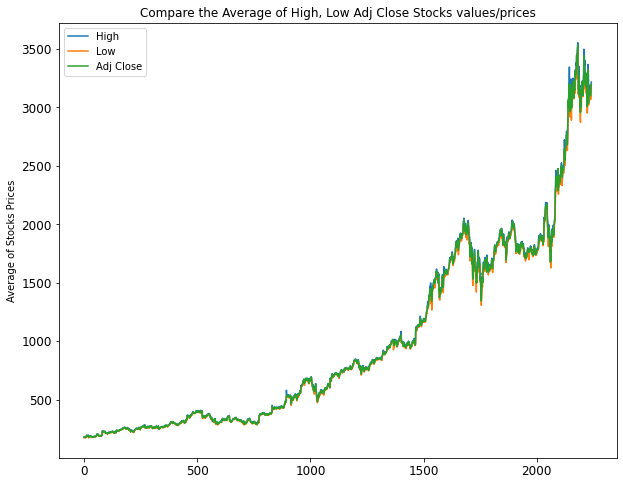

In [102]:
data[['Day','High','Low','Adj Close']].plot(figsize=(10,8), y=['High','Low','Adj Close'], fontsize =12,legend=True,
                                                          title = "Compare the Average of High, Low Adj Close Stocks values/prices")
plt.ylabel("Average of Stocks Prices")

In [104]:
#Query the data to answer some questions
# Find the months that have been the highest and lowest number of volume
r = data[['Month','Volume']].groupby(['Month']).sum()
r

,Volume
Month,
1,884620.5
2,846030.2
3,839584.5
4,890804.0
5,693382.7
6,671267.7
7,792035.2
8,633655.4
9,650017.7


In [106]:
print('The month with the lowest volume', r.idxmin()[0],'Volume',r.min()[0]*1000)
print('The month with the highest volume', r.idxmax()[0],'Volume',r.max()[0]*1000)

The month with the lowest volume 8 Volume 633655399.9999995
The month with the highest volume 10 Volume 897270199.9999995


In [107]:
#Find the date that has the highest and lowest number of volume
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374.4,2020,11,20
2238,2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708.9,2020,11,23
2239,2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602.1,2020,11,24
2240,2020-11-25,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790.4,2020,11,25


In [108]:
r = data['Volume']
s = r.idxmin()
l = r.idxmax()
print('The row with the lowest volume is ', s)
print('The row with the highest volume is', l)

The row with the lowest volume is  2007
The row with the highest volume is 773


In [114]:
print('The month with the lowest volume', data.iloc[s]['Date'],'Volume' ,data.iloc[s]['Volume']*1000)
print('The month with the highest volume', data.iloc[l]['Date'],'Volume' , data.iloc[l]['Volume']*1000)
                                                                                        

The month with the lowest volume 2020-01-15 00:00:00 Volume 2896600.0
The month with the highest volume 2015-02-20 00:00:00 Volume 3258000.0


In [116]:
#Find the month and day that has the lowest closing average price:
r = data[['Month','Day','Adj Close']].groupby(['Month','Day']).mean()
r.head(20)

Adj Close
Month Day            
1     2    931.658335
      3    881.009992
      4    769.301659
      5    624.636002
      6    700.508339
      7    851.536667
      8    910.175703
      9    844.117504
      10   918.849997
      11   796.806687
      12   640.813996
      13   692.398344
      14   840.531652
      15   843.580012
      16   970.341654
      17   930.629988
      18   851.711975
      19   718.137478
      20   465.117508
      21   792.830002

In [117]:
print('The month and day with the lowest closing price is', r.idxmin()[0],'The Adj Price is', r.min()[0])

The month and day with the lowest closing price is (2, 29) The Adj Price is 366.105011


In [122]:
#show the closing, open, year, month, day of the highest volume
r = data.loc[data['Adj Close'].idxmax()]
r

Date         2020-09-02 00:00:00
Open                        3547
High                     3552.25
Low                      3486.69
Close                    3531.45
Adj Close                3531.45
Volume                    3931.5
Year                        2020
Month                          9
Day                            2
Name: 2181, dtype: object

In [125]:
print('Closing: ', r['Close'], 'Open: ', r['Open'], 'Year: ', r['Year'], 'Month: ', r['Month'], 'Day: ', r['Day'],
    'Volume: ', r['Volume'] *1000)

Closing:  3531.4499509999996 Open:  3547.0 Year:  2020 Month:  9 Day:  2 Volume:  3931500.0
